In [96]:
import numpy as np
import scipy
from scipy import stats
from scipy.special import beta

import matplotlib.pyplot as plt
import matplotlib.style as style

In [2]:
style.use('fivethirtyeight')

%config InlineBackend.figure_format='retina'

In [9]:
beta(2, 2) == 1 / 6

True

# Prior Investigation

In [11]:
# Prior parameter mean 
theta = 0.15

a = 15 # Number of returns
b = 85 # Number of no returns


In [33]:
beta_dist = stats.beta(a, b)

In [34]:
x = np.arange(0, 1, 0.01)

In [35]:
prior = beta_dist.pdf(x)

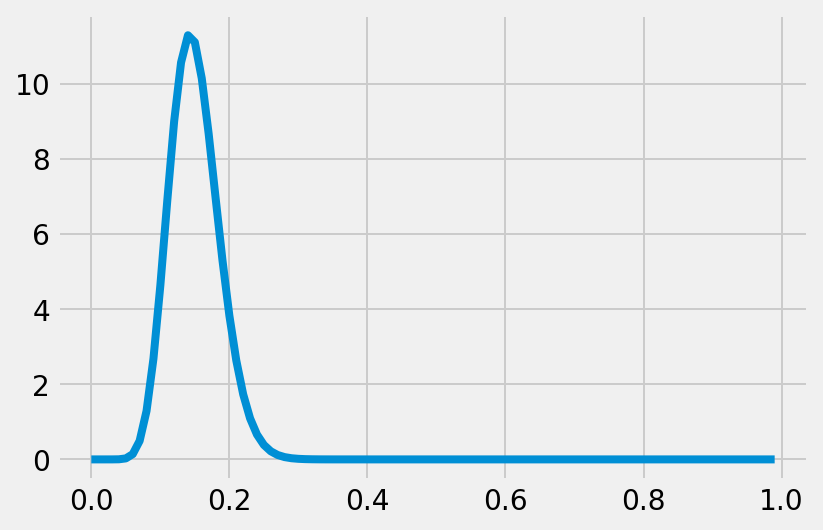

In [36]:
plt.plot(x, prior)

In [29]:
beta_dist.mean()

0.15

In [3]:
def prior(a, b, theta):
    beta_numerator = theta**(a - 1) * (1 - theta)**(b - 1)
    beta_denominator = beta(a, b)
    return beta_numerator / beta_denominator

In [68]:
prior(10, 3, 0.15)

1.833171591796874e-05

In [69]:
stats.beta(10, 3).pdf(0.15)

1.833171591796877e-05

## Likelihood

In [4]:
def likelihood(a, b, theta): 
    return theta**a * (1 - theta)**b

In [112]:
likelihood(15, 85, 0.15)

4.385080511372136e-19

## Data

In [12]:
def p_data(a, b):
    return beta(a + 1, b + 1)

In [11]:
beta(85,15)

3.0959124420019954e-19

In [73]:
beta(a_total, b_total)

1.2904904112695274e-21

In [ ]:
1

In [83]:
# Prior
a_p = 15
b_p = 85


# Likelihood
# a_l = 2
# b_l = 8
# a_l = 4
# b_l = 16
# a_l = 8
# b_l = 32
a_l = 40
b_l = 160

# Data
a_total = a_p + a_l
b_total = b_p + b_l



In [84]:
theta = 0.57

top = ( theta**(59 - 1) * (1 - theta)**(45 - 1) )
bottom = beta(59, 45)

top / bottom

8.191155389821201

In [85]:
top

5.168370923101797e-31

In [86]:
bottom

6.30969707829534e-32

In [87]:
beta(59, 45)

6.30969707829534e-32

In [88]:
def posterior(theta):
    
    likelihood_term = likelihood(a_l, b_l, theta)
    
    prior_term = prior(a_p, b_p, theta)
    
    data_term = p_data(a_total, b_total)
    
    post = (likelihood_term * prior_term) / data_term
    
    # print(likelihood_term * prior_term)
    # # print(prior_term)
    # print(data_term)
    # print(post)
    # print('\n')
    
    return post
    

In [89]:
thetas = np.arange(0, 1, 0.01)

In [90]:
pdf = [posterior(theta) for theta in thetas]

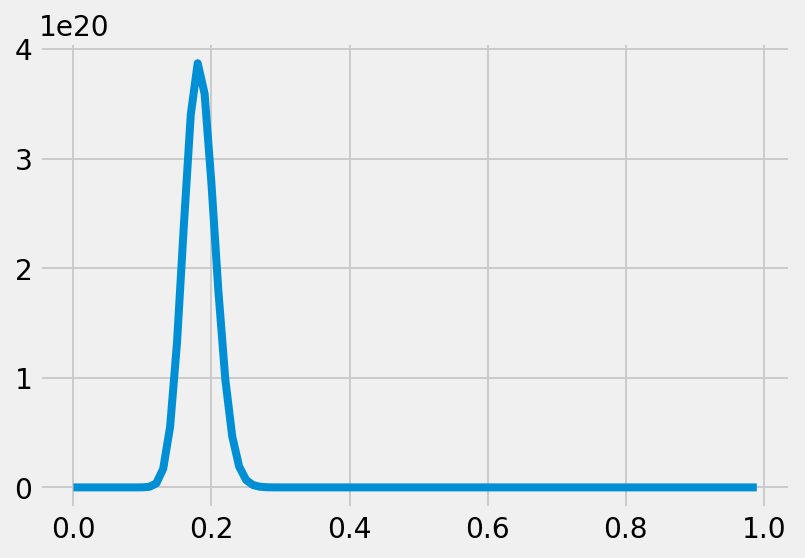

In [91]:
plt.plot(thetas, pdf)

In [92]:
# Not normalized....

In [93]:
idx = np.array(pdf).argmax()

In [94]:
thetas[idx]

0.18

## New attempt

In [123]:
def calc_likelihood(theta, n, k):
    pK = scipy.stats.binom(n, theta).pmf(k)
    #From scipy API, binom.pmf(k) = choose(n, k) * theta^k * (1-theta)^(n-k)
    likelihood = n*pK
    return likelihood


def calc_prior(theta, a, b):
    return scipy.stats.beta(a, b).pdf(theta)


def calc_posterior(thetas, a_old, b_old, n, k):
    a_new = a_old+k
    b_new = b_old+n-k
    posterior = scipy.stats.beta(a_new, b_new).pdf(thetas)
    return posterior, a_new, b_new


In [121]:
# Prior
a_p = 15
b_p = 85


# Likelihood
a_l = 2
b_l = 8
# # a_l = 4
# # b_l = 16
# # a_l = 8
# # b_l = 32
# a_l = 40
# b_l = 160

# Data
a_total = a_p + a_l
b_total = b_p + b_l



In [122]:
calc_likelihood(0.20, a_l + b_l, a_l)

3.0198988800000026

In [124]:
calc_prior(0.2, a_p, b_p)

3.8299241855282182

In [128]:
posterior_pdf = calc_posterior(thetas, a_p, b_p, a_l+b_l, a_l)

In [130]:
posterior_pdf

(array([0.00000000e+000, 2.20078825e-012, 5.66786178e-008, 1.44903870e-005,
        5.57254594e-004, 7.55495901e-003, 5.27621997e-002, 2.32348709e-001,
        7.27880800e-001, 1.75318845e+000, 3.42334938e+000, 5.62735003e+000,
        8.00656310e+000, 1.00694380e+001, 1.13774895e+001, 1.16988094e+001,
        1.10599814e+001, 9.69410227e+000, 7.93185666e+000, 6.09283908e+000,
        4.41467859e+000, 3.02929432e+000, 1.97518008e+000, 1.22724833e+000,
        7.28401302e-001, 4.13825003e-001, 2.25440604e-001, 1.17940703e-001,
        5.93278390e-002, 2.87260826e-002, 1.33998554e-002, 6.02620367e-003,
        2.61432742e-003, 1.09457429e-003, 4.42430541e-004, 1.72686297e-004,
        6.50935527e-005, 2.36972795e-005, 8.33131080e-006, 2.82825712e-006,
        9.26862375e-007, 2.93134635e-007, 8.94343614e-008, 2.63100920e-008,
        7.45901816e-009, 2.03661065e-009, 5.35169762e-010, 1.35234060e-010,
        3.28327885e-011, 7.65127546e-012, 1.70962486e-012, 3.65849559e-013,
        7.48

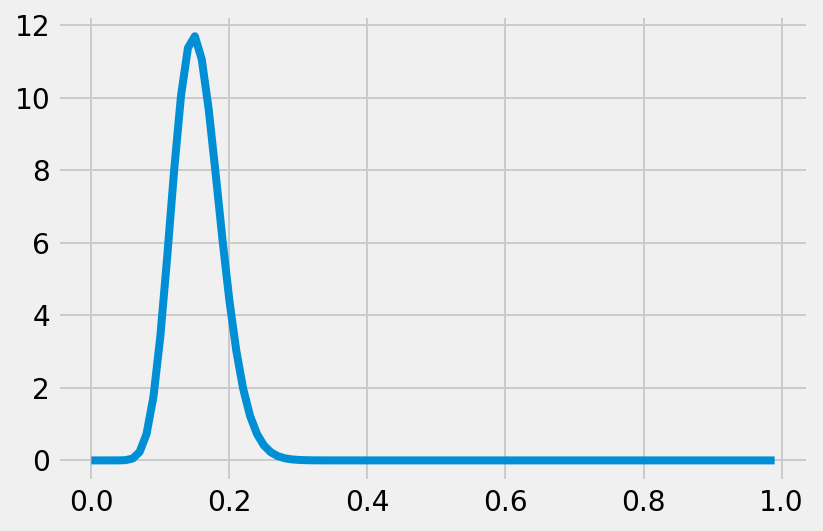

In [132]:
plt.plot(thetas, posterior_pdf[0])